In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X = df.drop('math_score',axis=1)
y = df['math_score']

In [5]:
X.shape

(1000, 7)

In [6]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer([
    ("OneHotEncoder",oh_transformer,cat_features),
    ('standardScaler',numeric_transformer,num_features)
])

In [7]:
X = preprocessor.fit_transform(X)

In [8]:
X.shape

(1000, 14)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 14), (200, 14))

In [10]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square  = r2_score(true,predicted)
    return mae,rmse,r2_square

In [11]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbors Regressor' : KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for training set')
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error {:.4f}".format(model_train_mae))
    print("-R2 Score {:.4f}".format(model_train_r2))

    print('------------------------------------------------')

    print('Model Performance for training set')
    print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error {:.4f}".format(model_test_mae))
    print("-R2 Score  {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model Performance for training set
-Root Mean Squared Error: 5.3231
-Mean Absolute Error 4.2667
-R2 Score 0.8743
------------------------------------------------
Model Performance for training set
-Root Mean Squared Error: 5.3940
-Mean Absolute Error 4.2148
-R2 Score  0.8804


Lasso
Model Performance for training set
-Root Mean Squared Error: 6.5938
-Mean Absolute Error 5.2063
-R2 Score 0.8071
------------------------------------------------
Model Performance for training set
-Root Mean Squared Error: 6.5197
-Mean Absolute Error 5.1579
-R2 Score  0.8253


Ridge
Model Performance for training set
-Root Mean Squared Error: 5.3235
-Mean Absolute Error 4.2650
-R2 Score 0.8743
------------------------------------------------
Model Performance for training set
-Root Mean Squared Error: 5.3936
-Mean Absolute Error 4.2125
-R2 Score  0.8805


K-Neighbors Regressor
Model Performance for training set
-Root Mean Squared Error: 5.5678
-Mean Absolute Error 4.4510
-R2 Score 0.8625
-

In [12]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880451
0,Linear Regression,0.880433
5,RandomForestRegressor,0.852364
7,CatBoostRegressor,0.849801
8,AdaBoostRegressor,0.846748
1,Lasso,0.825320
6,XGBRegressor,0.825046
3,K-Neighbors Regressor,0.776335
4,Decision Tree,0.723574


In [14]:
l_model = LinearRegression(fit_intercept=True)
l_model = l_model.fit(x_train,y_train)
y_pred = l_model.predict(x_test)
score = r2_score(y_test,y_pred)
print("Accuracy_score is %.2f" %score)

Accuracy_score is 0.88


Text(0, 0.5, 'predicted')

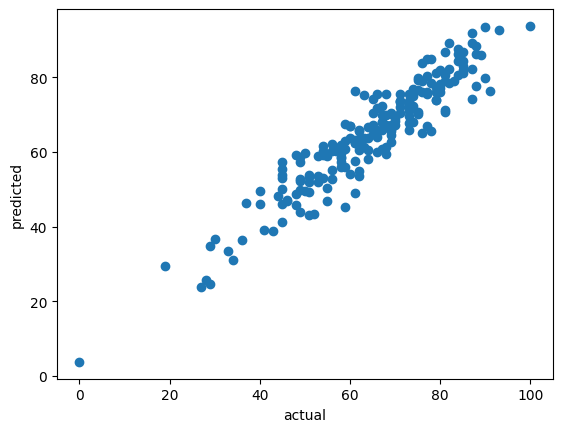

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')


<Axes: xlabel='math_score'>

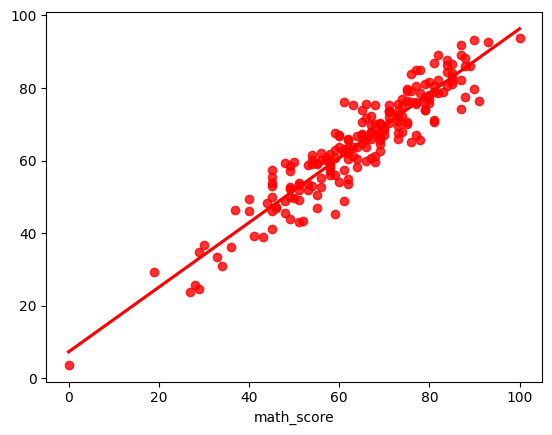

In [21]:
sns.regplot(x=y_test,y=y_pred,ci = None,color='red')

In [24]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Defference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Defference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
